## Stage 1 - Importing all needed Libraries and reading the Data file

In [17]:
# Importing all the needed Libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # Use the ggplot style in rendering our graphs
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8) # This will adjust the size of graphs when displayed

# To read our files into the dataframe and using latin-1 as encoding as default utf-8 reported encoding error
movie = pd.read_csv('movies.csv', encoding='latin-1')
movie.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


## Stage 2 - Understanding our Data 

In [3]:
# Check for column name, missing values, dtype, total number of records
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [4]:
# Checking for column names only
movie.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year'],
      dtype='object')

In [5]:
# to confirm the total number of rows and columns in the dataset 
movie.shape

(6820, 15)

In [6]:
# Checking for countries whose data are included
movie['country'].unique()

array(['USA', 'UK', 'Australia', 'Italy', 'France', 'Sweden', 'Japan',
       'Spain', 'Switzerland', 'Canada', 'Israel', 'Netherlands',
       'Argentina', 'Denmark', 'West Germany', 'Hong Kong', 'Belgium',
       'Ireland', 'South Africa', 'Hungary', 'Iran', 'New Zealand',
       'Germany', 'China', 'Peru', 'Soviet Union', 'Mexico', 'Brazil',
       'Taiwan', 'India', 'Austria', 'Portugal', 'Cuba',
       'Republic of Macedonia', 'Russia', 'Greece', 'Norway', 'Romania',
       'Jamaica', 'Federal Republic of Yugoslavia', 'Aruba',
       'Czech Republic', 'South Korea', 'Finland', 'Thailand', 'Colombia',
       'Palestine', 'Indonesia', 'Saudi Arabia', 'Chile', 'Poland',
       'Kenya', 'Bahamas', 'Ukraine', 'Iceland', 'Malta', 'Panama'],
      dtype=object)

In [7]:
# Checking for genre that are in the dataset
movie['genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Thriller',
       'Horror', 'Animation', 'Biography', 'Sci-Fi', 'Musical', 'Family',
       'Fantasy', 'Mystery', 'War', 'Romance', 'Western'], dtype=object)

In [8]:
# Checking for ratings included in the dataset
movie['rating'].unique()

array(['R', 'PG-13', 'PG', 'UNRATED', 'Not specified', 'G', 'NC-17',
       'NOT RATED', 'TV-PG', 'TV-MA', 'B', 'B15', 'TV-14'], dtype=object)

In [9]:
# Getting a statistical idea of the numeric data in the dataset
movie.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


## Stage 3 - Modifying, Adjusting and Cleaning our data

In [10]:
# Cross checking for missing values
for col in movie.columns:
    missing_in_percent = np.mean(movie[col].isnull())
    print('{} - {}%'.format(col, round(missing_in_percent*100)))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [11]:
# Changing the data type of columns 
movie['budget'] = movie['budget'].astype('int64')
movie['gross'] = movie['gross'].astype('int64')

In [12]:
# Checking the last 5 entries in the dataset after changing data type
movie.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


In [13]:
# Harmonizing the year portion of released date with year column 
movie['year_adjusted'] = movie['released'].astype(str).str[:4]
movie

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_adjusted
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


In [14]:
# Sort the dataset with the gross column in descending order
gross_sorted = movie.sort_values(by=['gross'], inplace=False, ascending=False)
gross_sorted.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_adjusted
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [15]:
# Putting the entire dataset on display in your screen
pd.set_option('display.max_rows',None)

## Stage 4 - Visualizing our data for different reasons

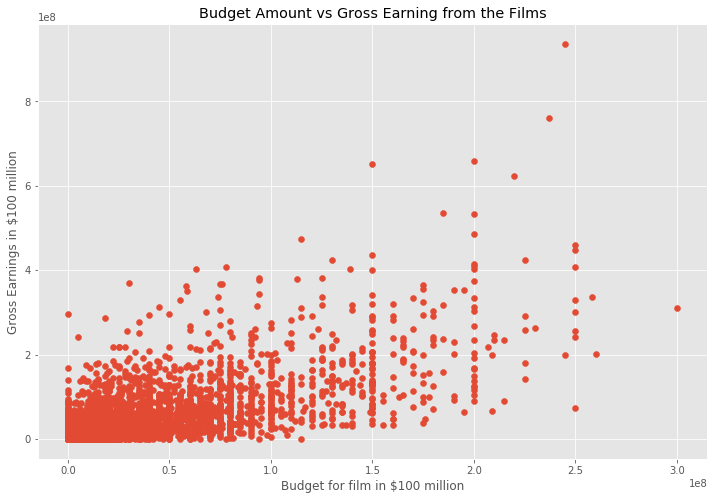

In [18]:
# Task 1 Scatter plot to compare Budget and Gross

plt.scatter(x=movie['budget'], y=movie['gross'])
plt.title('Budget Amount vs Gross Earning from the Films')
plt.xlabel('Budget for film in $100 million')
plt.ylabel('Gross Earnings in $100 million')
plt.show()

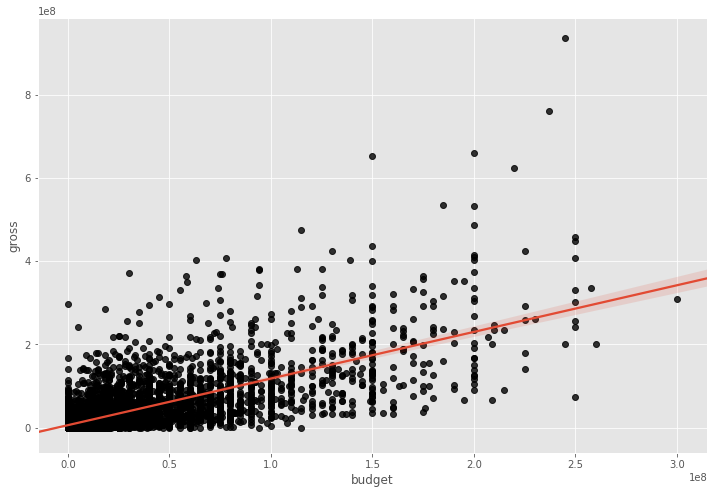

In [19]:
# ploting Budget vs Gross
sns.regplot(x="budget", y="gross", data=movie, scatter_kws={'color':'black'})

In [20]:
# Task 2 - Checking Correlation on numeric coloumns using different methods

# understanding the correlation in the dataset (methods are pearson, kendall, spearman)
movie.corr(method='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [21]:
# understanding the correlation in the dataset (methods are pearson, kendall, spearman)
movie.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [22]:
# understanding the correlation in the dataset (methods are pearson, kendall, spearman)
movie.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


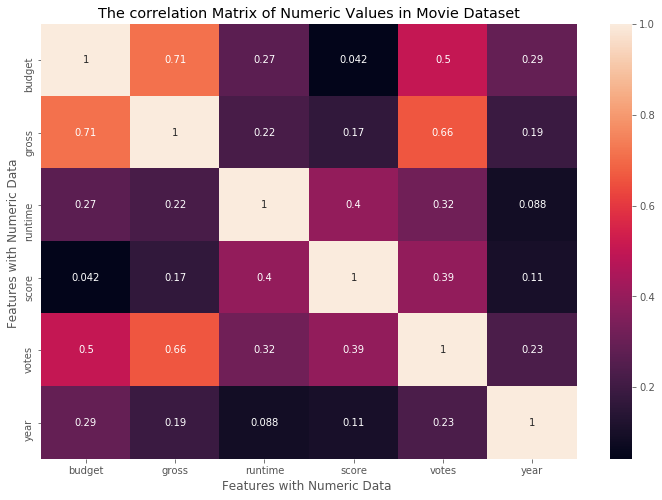

In [23]:
# Task 3 - Visualizing the correlation matrix

correlation_matrix = movie.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# Labelling the viz
plt.title('The correlation Matrix of Numeric Values in Movie Dataset')
plt.xlabel('Features with Numeric Data ')
plt.ylabel('Features with Numeric Data ')
plt.show()

In [24]:
# Task 4 Looking at the top 10 companies by gross revenue

gross_revenue = movie.groupby('company')[["gross"]].sum()

gross_revenue_sorted = gross_revenue.sort_values('gross', ascending = False)[:10]

gross_revenue_sorted = gross_revenue_sorted['gross'].astype('int64')
gross_revenue_sorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
Name: gross, dtype: int64

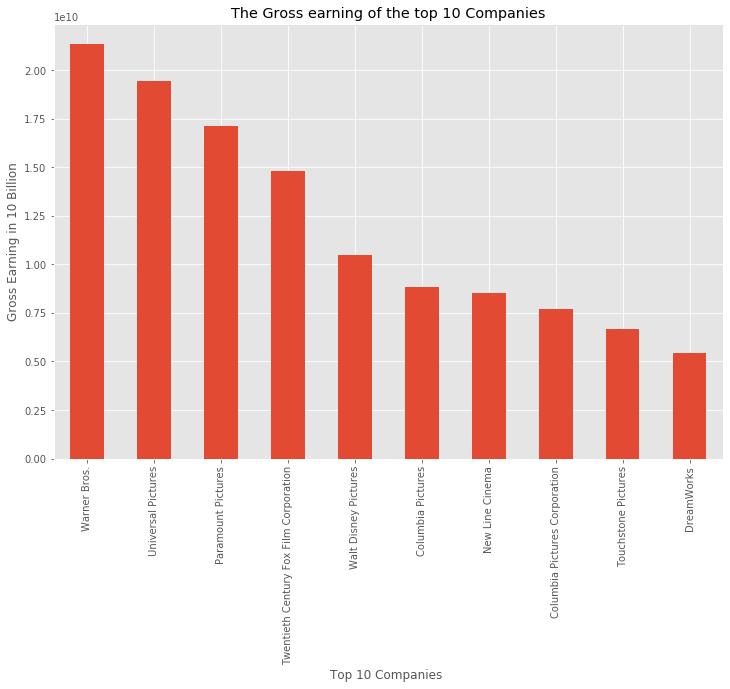

In [25]:
gross_revenue_sorted[:10].plot(kind='bar')
plt.title('The Gross earning of the top 10 Companies')
plt.xlabel('Top 10 Companies ')
plt.ylabel('Gross Earning in 10 Billion')
plt.show();

In [26]:
# Task 5: Looking at the Genre with the highest number of movies
genre_total = movie['genre'].value_counts()
genre_total

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Horror        277
Animation     277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
Western         2
War             2
Name: genre, dtype: int64

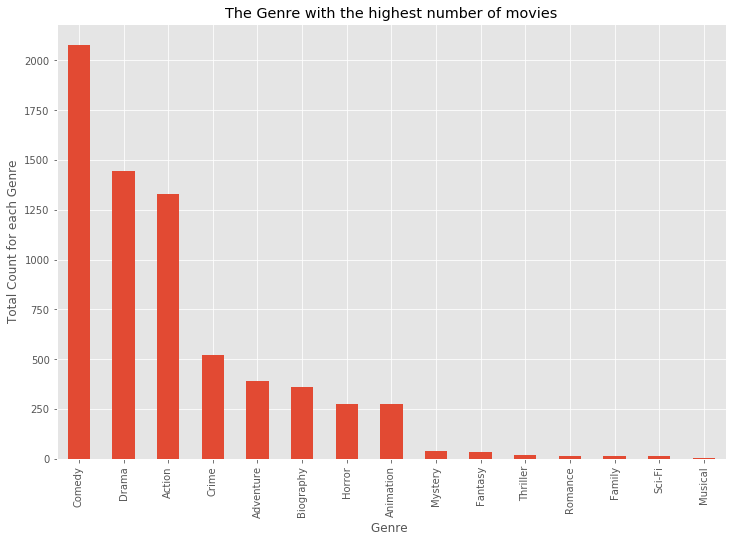

In [27]:
genre_total.iloc[:15].plot(kind="bar")
plt.title('The Genre with the highest number of movies')
plt.xlabel('Genre ')
plt.ylabel('Total Count for each Genre')
plt.show()

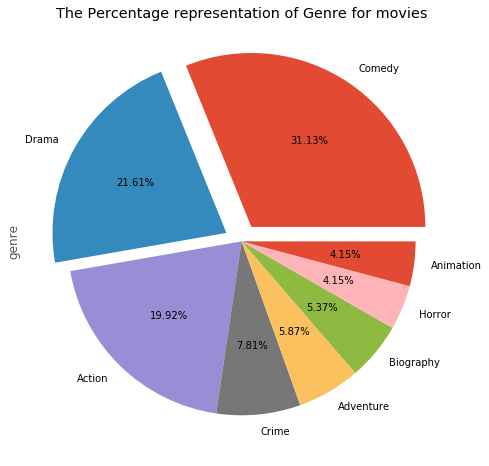

In [28]:
myexplode = [0.1, 0.1, 0, 0,0,0,0,0]
genre_total.iloc[:8].plot(kind="pie", explode= myexplode, autopct='%1.2f%%')
plt.title('The Percentage representation of Genre for movies')
plt.show()

In [31]:
# Task 6: Looking at the Rating with the highest number of movies
rating_total = movie['rating'].value_counts()
rating_total

R                3392
PG-13            1995
PG                951
NOT RATED         174
G                 147
UNRATED            71
Not specified      63
NC-17              22
TV-MA               1
B15                 1
TV-PG               1
B                   1
TV-14               1
Name: rating, dtype: int64

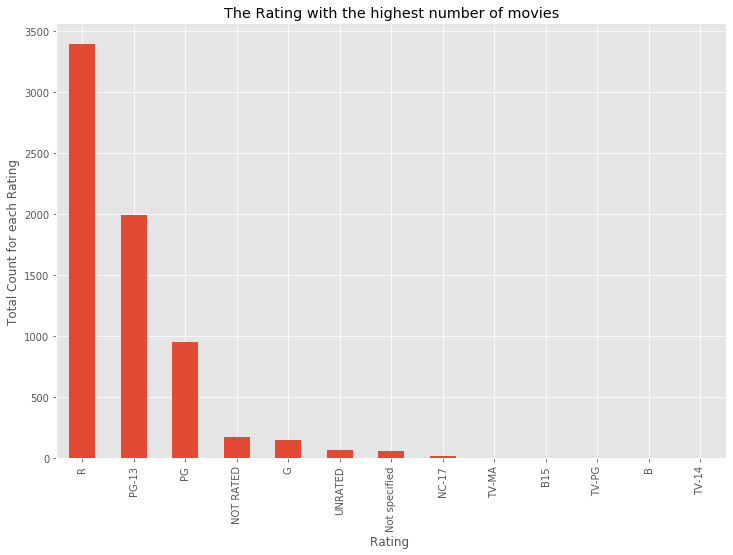

In [32]:
rating_total.plot(kind="bar")
plt.title('The Rating with the highest number of movies')
plt.xlabel('Rating ')
plt.ylabel('Total Count for each Rating')
plt.show()

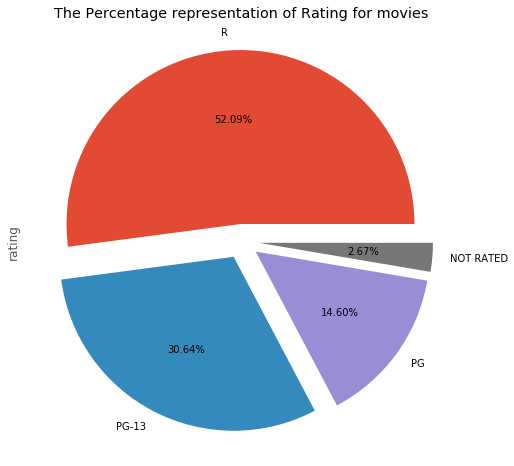

In [33]:
myexplode = [0.1, 0.1, 0.1, 0.1]
rating_total.iloc[:4].plot(kind="pie", explode= myexplode, autopct='%1.2f%%')
plt.title('The Percentage representation of Rating for movies')
plt.show()

## Stage 5: Summary of findings
1 There is a 0.71 correlationship between Budget and Gross Revenue <br>
2 There is a 0.66 correlationship beween Vote and Gross Revenue <br>
3 Comedy genre was the highest produced movies within the period under review at 33% of Total movie <br>
4 Of the Movies produced, R rating has the highest number and takes 52.09% of total movies